In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error


d:\Health_care_data_analysis\healthenv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df=pd.read_csv("master_dataset_again.csv")

In [39]:
df_sorted = df.sort_values(by=["Country", "Year"], ascending=[True, True])


In [43]:
df_sorted.head(5)

,Country,AGE:Current age,Year,VACCINE:Vaccine,OBS_VALUE:Observation Value,"Life expectancy at birth, total (years)","Literacy rate, adult total (% of people ages 15 and above)",Renewable energy consumption,GDP per capita (current US$),Annual CO₂ emissions (per capita),"Child mortality rate of children aged under five years, per 100 live births"
2679,Afghanistan,Y0: Under 1 year old,1990,BCG: Bacille calmette-guerin (tuberculosis),30,45.118,70.933682,23.0,5814.996841,0.168055,18.065842
2689,Afghanistan,M12T23: 12 to 23 months old,1990,"DTP1: Diphtheria, tetanus, and pertussis first...",50,45.118,70.933682,23.0,5814.996841,0.168055,18.065842
2699,Afghanistan,M12T23: 12 to 23 months old,1990,"DTP3: Diphtheria, tetanus, and pertussis third...",25,45.118,70.933682,23.0,5814.996841,0.168055,18.065842
2725,Afghanistan,M12T23: 12 to 23 months old,1990,MCV1: Measles first dose,20,45.118,70.933682,23.0,5814.996841,0.168055,18.065842
2738,Afghanistan,M12T23: 12 to 23 months old,1990,POL3: Polio third dose,25,45.118,70.933682,23.0,5814.996841,0.168055,18.065842


In [70]:
rr=df.copy()

In [71]:
rr.head()

,Country,AGE:Current age,Year,VACCINE:Vaccine,OBS_VALUE:Observation Value,"Life expectancy at birth, total (years)","Literacy rate, adult total (% of people ages 15 and above)",Renewable energy consumption,GDP per capita (current US$),Annual CO₂ emissions (per capita),"Child mortality rate of children aged under five years, per 100 live births"
0,Mozambique,M12T23: 12 to 23 months old,1994,MCV1: Measles first dose,65,46.086,68.087554,93.1,196.763143,0.073038,21.545652
1,Mozambique,M12T23: 12 to 23 months old,1999,MCV1: Measles first dose,67,48.837,75.010407,94.2,354.406246,0.065880,17.240568
2,Mozambique,M12T23: 12 to 23 months old,2002,MCV1: Measles first dose,77,50.879,74.992372,93.2,313.886662,0.081076,14.596339
3,Mozambique,M12T23: 12 to 23 months old,2012,MCV1: Measles first dose,83,56.460,79.603410,84.5,685.685748,0.125391,8.629851
4,Mozambique,M12T23: 12 to 23 months old,2014,MCV1: Measles first dose,83,57.965,80.522965,81.2,697.142680,0.314951,7.920690


In [74]:
rr=rr.drop_duplicates()

In [75]:
rr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34017 entries, 0 to 34016
Data columns (total 11 columns):
 #   Column                                                                       Non-Null Count  Dtype  
---  ------                                                                       --------------  -----  
 0   Country                                                                      34017 non-null  object 
 1   AGE:Current age                                                              34017 non-null  object 
 2   Year                                                                         34017 non-null  int64  
 3   VACCINE:Vaccine                                                              34017 non-null  object 
 4   OBS_VALUE:Observation Value                                                  34017 non-null  int64  
 5   Life expectancy at birth, total (years)                                      34017 non-null  float64
 6   Literacy rate, adult total (% of peopl

In [49]:
result = df_sorted.groupby('Year')['OBS_VALUE:Observation Value'].mean().reset_index()


In [46]:
result.head()

,Year,OBS_VALUE:Observation Value
0,1990,81.125000
1,1991,79.250751
2,1992,79.315720
3,1993,79.993606
4,1994,80.517024


14:08:08 - cmdstanpy - INFO - Chain [1] start processing
14:08:14 - cmdstanpy - INFO - Chain [1] done processing


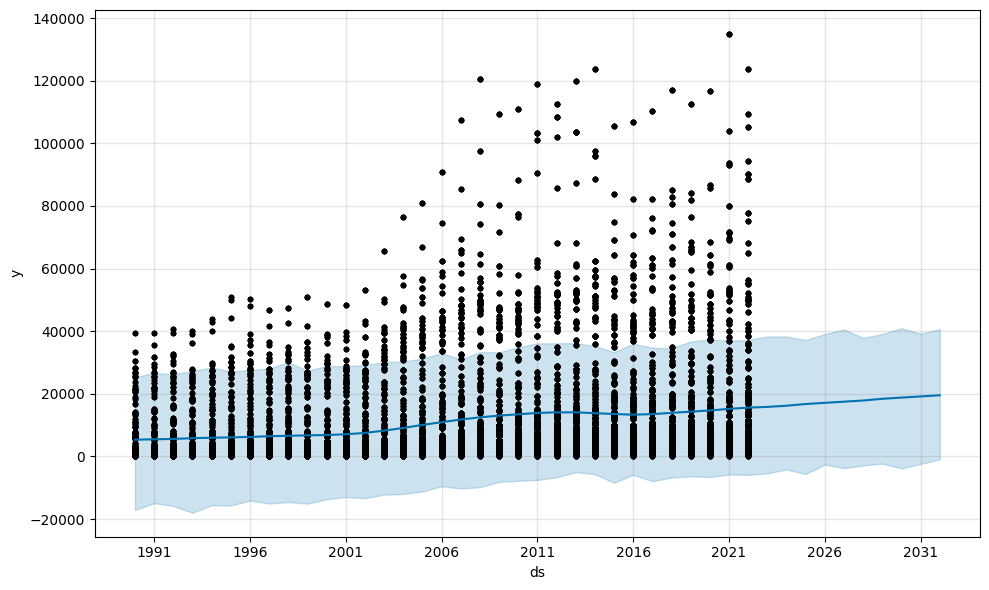

In [4]:

data = pd.DataFrame() 
data["ds"] = pd.to_datetime(df["Year"], format="%Y")
data["y"] = df["GDP per capita (current US$)"]

model = Prophet()
model.fit(data[["ds", "y"]])


future = model.make_future_dataframe(periods=10, freq="YE")
forecast = model.predict(future)


fig = model.plot(forecast)

In [5]:
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail(15)


,ds,yhat,yhat_lower,yhat_upper
28,2018-01-01,13911.264483,-6763.177228,34493.226975
29,2019-01-01,14301.907924,-6338.834256,36753.223309
30,2020-01-01,14688.135258,-6554.127366,37351.837637
31,2021-01-01,15187.183002,-5804.550488,36923.458194
32,2022-01-01,15582.275284,-5890.133915,37224.247135
33,2022-12-31,15820.738977,-5384.583660,38293.617352
34,2023-12-31,16189.750147,-4176.179565,38319.453945
35,2024-12-31,16740.996110,-5611.155769,37189.442633
36,2025-12-31,17118.513740,-2614.295212,39109.844515
37,2026-12-31,17491.749778,-3757.635790,40548.271135


19:37:22 - cmdstanpy - INFO - Chain [1] start processing
19:37:23 - cmdstanpy - INFO - Chain [1] done processing


MAE: 940.1912078139407
RMSE: 1175.1474507906814


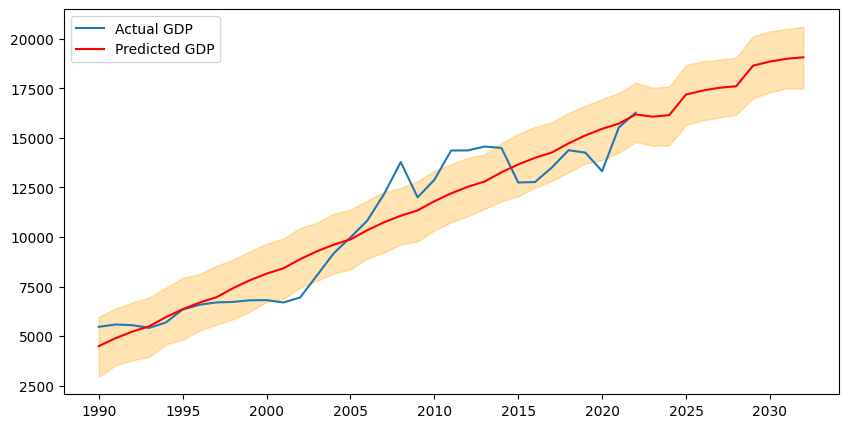

In [ ]:

df_yearly = df.groupby("Year")["GDP per capita (current US$)"].mean().reset_index()


data = df_yearly.rename(columns={"Year": "ds", "GDP per capita (current US$)": "y"})
data["ds"] = pd.to_datetime(data["ds"], format="%Y")


model = Prophet()
model.fit(data)


future = model.make_future_dataframe(periods=10, freq="YE")
forecast = model.predict(future)


y_true = data["y"].values
y_pred = forecast.loc[: len(data)-1, "yhat"].values  

mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

print("MAE:", mae)
print("RMSE:", rmse)

import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(data["ds"], data["y"], label="Actual GDP")
plt.plot(forecast["ds"], forecast["yhat"], label="Predicted GDP", color="red")
plt.fill_between(forecast["ds"], forecast["yhat_lower"], forecast["yhat_upper"], alpha=0.3, color="orange")
plt.legend()
plt.show()


19:37:39 - cmdstanpy - INFO - Chain [1] start processing
19:37:39 - cmdstanpy - INFO - Chain [1] done processing


MAE: 1.6270935325690195
RMSE: 2.118324887193229


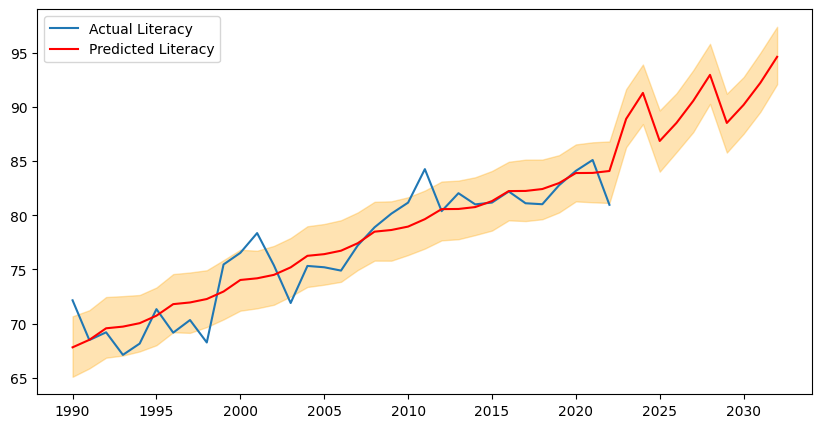

In [ ]:


df_yearly = df.groupby("Year")["Literacy rate, adult total (% of people ages 15 and above)"].mean().reset_index()

data = df_yearly.rename(columns={"Year": "ds", "Literacy rate, adult total (% of people ages 15 and above)": "y"})
data["ds"] = pd.to_datetime(data["ds"], format="%Y")

model = Prophet()
model.fit(data)


future = model.make_future_dataframe(periods=10, freq="YE")
forecast = model.predict(future)

y_true = data["y"].values
y_pred = forecast.loc[: len(data)-1, "yhat"].values  

mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

print("MAE:", mae)
print("RMSE:", rmse)

import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(data["ds"], data["y"], label="Actual Literacy")
plt.plot(forecast["ds"], forecast["yhat"], label="Predicted Literacy", color="red")
plt.fill_between(forecast["ds"], forecast["yhat_lower"], forecast["yhat_upper"], alpha=0.3, color="orange")
plt.legend()
plt.show()


19:37:52 - cmdstanpy - INFO - Chain [1] start processing
19:37:52 - cmdstanpy - INFO - Chain [1] done processing


MAE: 0.22847938518179936
RMSE: 0.34254948804173435


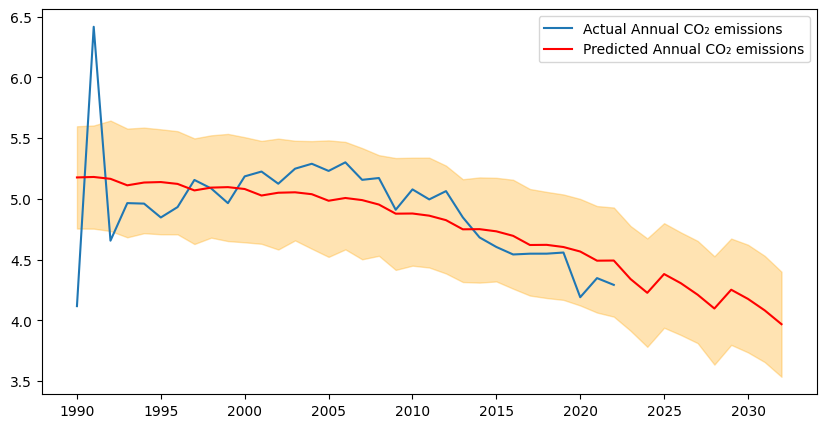

In [ ]:


df_yearly = df.groupby("Year")["Annual CO₂ emissions (per capita)"].mean().reset_index()

data = df_yearly.rename(columns={"Year": "ds", "Annual CO₂ emissions (per capita)": "y"})
data["ds"] = pd.to_datetime(data["ds"], format="%Y")


model = Prophet()
model.fit(data)


future = model.make_future_dataframe(periods=10, freq="YE")
forecast = model.predict(future)


y_true = data["y"].values
y_pred = forecast.loc[: len(data)-1, "yhat"].values  

mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

print("MAE:", mae)
print("RMSE:", rmse)

import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(data["ds"], data["y"], label="Actual Annual CO₂ emissions")
plt.plot(forecast["ds"], forecast["yhat"], label="Predicted Annual CO₂ emissions", color="red")
plt.fill_between(forecast["ds"], forecast["yhat_lower"], forecast["yhat_upper"], alpha=0.3, color="orange")
plt.legend()
plt.show()


19:38:05 - cmdstanpy - INFO - Chain [1] start processing
19:38:06 - cmdstanpy - INFO - Chain [1] done processing


MAE: 0.4121764108464746
RMSE: 0.5888047530688117


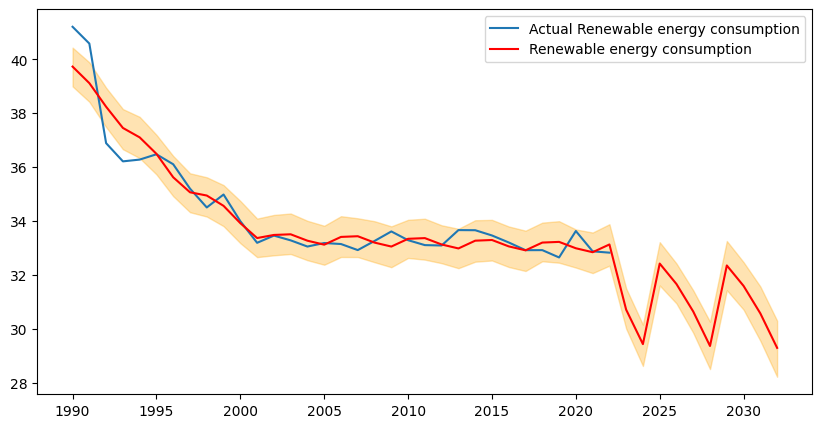

In [ ]:


df_yearly = df.groupby("Year")["Renewable energy consumption"].mean().reset_index()


data = df_yearly.rename(columns={"Year": "ds", "Renewable energy consumption": "y"})
data["ds"] = pd.to_datetime(data["ds"], format="%Y")

# ---------------------------
# Step 2: Prophet model
# ---------------------------
model = Prophet()
model.fit(data)

future = model.make_future_dataframe(periods=10, freq="YE")
forecast = model.predict(future)


y_true = data["y"].values
y_pred = forecast.loc[: len(data)-1, "yhat"].values  

mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

print("MAE:", mae)
print("RMSE:", rmse)



plt.figure(figsize=(10,5))
plt.plot(data["ds"], data["y"], label="Actual Renewable energy consumption")
plt.plot(forecast["ds"], forecast["yhat"], label="Renewable energy consumption", color="red")
plt.fill_between(forecast["ds"], forecast["yhat_lower"], forecast["yhat_upper"], alpha=0.3, color="orange")
plt.legend()
plt.show()


In [6]:

df_yearly = (
    df.groupby(["Country", "Year"])["GDP per capita (current US$)"]
      .mean()
      .reset_index()
)

print(df_yearly.head())


       Country  Year  GDP per capita (current US$)
0  Afghanistan  1990                   5814.996841
1  Afghanistan  1991                   5840.522573
2  Afghanistan  1992                   6123.312232
3  Afghanistan  1993                   5930.753492
4  Afghanistan  1994                   6282.892860


14:45:01 - cmdstanpy - INFO - Chain [1] start processing
14:45:01 - cmdstanpy - INFO - Chain [1] done processing


MAE: 76.41162680496541
RMSE: 93.0511951480497


d:\Health_care_data_analysis\healthenv\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


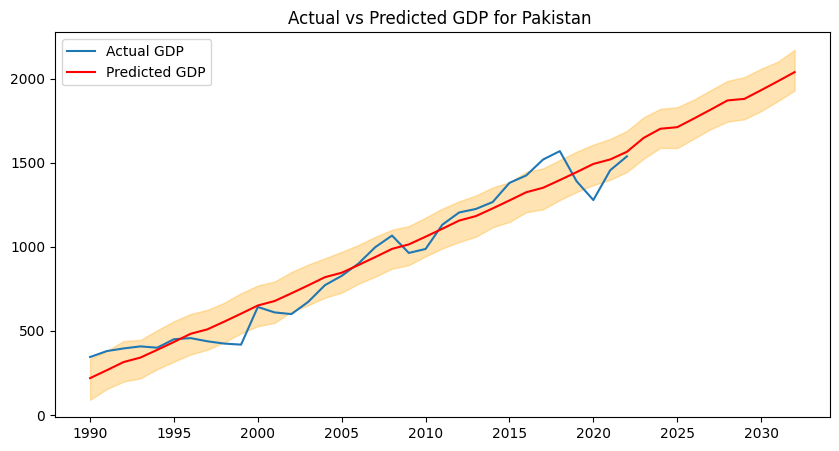

In [36]:
pakistan = df_yearly[df_yearly["Country"] == "Pakistan"]

# Prophet needs ds (time) and y (value)
data = pakistan.rename(columns={"Year": "ds", "GDP per capita (current US$)": "y"})

# Prophet expects ds to be a datetime
data["ds"] = pd.to_datetime(data["ds"], format="%Y")

# Fit model
model = Prophet()
model.fit(data)

# Forecast next 10 years
future = model.make_future_dataframe(periods=10, freq="Y")
forecast = model.predict(future)

y_true = data["y"].values
y_pred = forecast.loc[: len(data)-1, "yhat"].values  

mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

print("MAE:", mae)
print("RMSE:", rmse)



plt.figure(figsize=(10,5))
plt.title("Actual vs Predicted GDP for Pakistan ")
plt.plot(data["ds"], data["y"], label="Actual GDP ")
plt.plot(forecast["ds"], forecast["yhat"], label="Predicted GDP", color="red")
plt.fill_between(forecast["ds"], forecast["yhat_lower"], forecast["yhat_upper"], alpha=0.3, color="orange")
plt.legend()
plt.show()

In [37]:
future_forecast=forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail(1)
future_forecast['ds']=future_forecast['ds'].dt.year

In [38]:
future_forecast.head()

,ds,yhat,yhat_lower,yhat_upper
42,2031,2039.329006,1929.148918,2172.211722


In [21]:
summary = []
for index, row in future_forecast.iterrows():
    text = f"📅 Year {row['ds']} → Predicted value: {row['yhat']:.2f} (Range: {row['yhat_lower']:.2f} - {row['yhat_upper']:.2f})"
    summary.append(text)

In [23]:
for index, row in future_forecast.iterrows():
    print(f"{row['ds']}")


2022.0
2023.0
2024.0
2025.0
2026.0
2027.0
2028.0
2029.0
2030.0
2031.0


In [24]:
# print(summary)
result = ", ".join(summary)


In [25]:
print(result)

📅 Year 2022.0 → Predicted value: 1648.00 (Range: 1528.73 - 1759.23), 📅 Year 2023.0 → Predicted value: 1702.50 (Range: 1586.41 - 1826.19), 📅 Year 2024.0 → Predicted value: 1711.70 (Range: 1587.71 - 1829.69), 📅 Year 2025.0 → Predicted value: 1763.34 (Range: 1649.63 - 1882.11), 📅 Year 2026.0 → Predicted value: 1816.42 (Range: 1699.75 - 1934.78), 📅 Year 2027.0 → Predicted value: 1870.91 (Range: 1753.45 - 1992.33), 📅 Year 2028.0 → Predicted value: 1880.12 (Range: 1760.83 - 2008.85), 📅 Year 2029.0 → Predicted value: 1931.76 (Range: 1801.63 - 2055.40), 📅 Year 2030.0 → Predicted value: 1984.83 (Range: 1858.78 - 2087.89), 📅 Year 2031.0 → Predicted value: 2039.33 (Range: 1921.74 - 2161.29)
